# Assignment 8: Correlation Analysis and Hypothesis Testing

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and hypothesis testing, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

**Correlation Analysis**
1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation? 


**Hypothesis Testing**
1. Why A/B testing?  
2. What is a permutation test? How to implement it?
3. What is p-value? How to avoid p-hacking? 
4. What is a chi-squared test? How to implement it?


In this assignment, you can use [pandas](https://pandas.pydata.org/) or PySpark to manipulate data, and use [matplotlib](https://matplotlib.org/) or [seaborn](seaborn.pydata.org) to make plots. 

## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example, 

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent? 

To answer these questions, you need to conduct correlation analysis. 

Imagine you are a data scientist working at a real-estate company. You download a dataset from [property_tax_report_2018.zip](property_tax_report_2018.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2018.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). 

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated. 

We first load the data as a DataFrame. 

In [1]:
import pandas as pd

df = pd.read_csv("property_tax_report_2018.csv")

df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)

### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose <font color='blue'>postcode starts with 'V6A'</font>. Furthermore, we remove the houses that were <font color='blue'>built before 1900</font>.

<img src="img/v6a.png", width=500/>

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

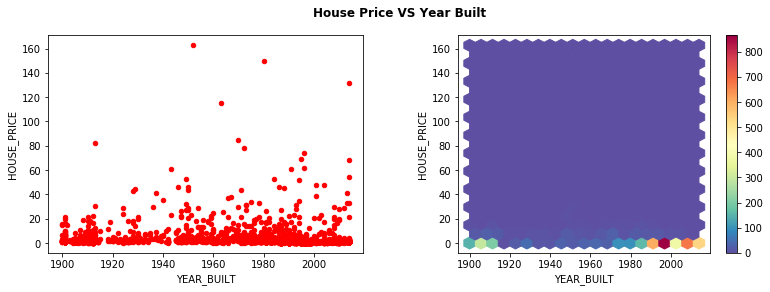

In [2]:
import matplotlib.pyplot as plt
import warnings

plot_df = df.dropna(subset=['PROPERTY_POSTAL_CODE', 'HOUSE_PRICE', 'YEAR_BUILT'])
plot_df = plot_df[plot_df['PROPERTY_POSTAL_CODE'].str.startswith("V6A", na = False)]
plot_df = plot_df[plot_df['YEAR_BUILT'] >= 1900].sort_values('YEAR_BUILT')

color_map = plt.cm.Spectral_r 
fig, ax = plt.subplots(ncols=2, figsize=(13,4))
fig.suptitle('House Price VS Year Built\n\n',fontweight="bold")
plot_df.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE', c='red', ax=ax[0])
plot_df.plot.hexbin(x='YEAR_BUILT', y='HOUSE_PRICE', gridsize=20, cmap=color_map, ax=ax[1])
plt.subplots_adjust(hspace = 0.6,wspace = 0.3 )
plt.show()

 

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. With the scatter plot between house prices and year built, we can find outliers in the dataset. As we can see, between the years 1900 and 2014, there are not much house greater than 70 million.

2. With the Hexbin plot we can establish the relationship betweeb 2 numerical variables (Price and year) where each window is split in several hexbins, and the number of points per hexbin is counted. From this plot, we can say approximantely bewteen 1995 and 2000 a majority of houses (close to 800) with price range (0-7 million) approx. where built.

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insight. One option is to bin one variable and plot percentiles of the other. 


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE. 
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`); 
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`); 
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


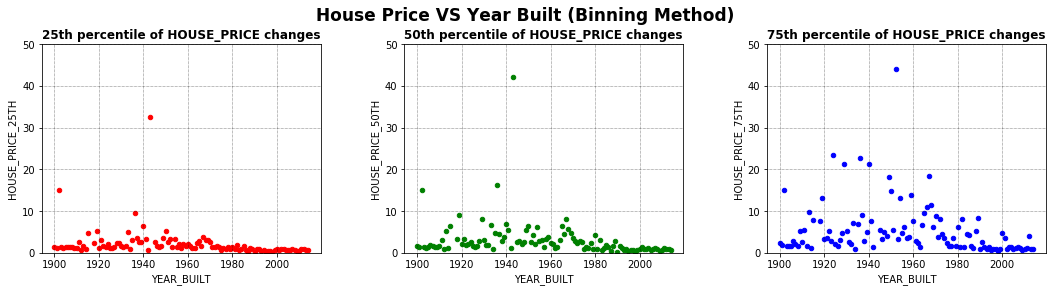

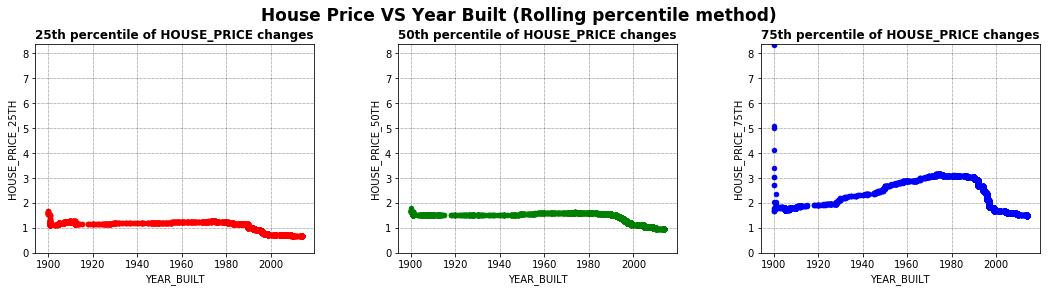

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plot_df = df.dropna(subset=['PROPERTY_POSTAL_CODE', 'HOUSE_PRICE', 'YEAR_BUILT'])
plot_df = plot_df[plot_df['PROPERTY_POSTAL_CODE'].str.startswith("V6A", na = False)]
plot_df = plot_df[plot_df['YEAR_BUILT'] >= 1900].sort_values('YEAR_BUILT')


# Binning each year method

plot_df_bin = plot_df.groupby('YEAR_BUILT').HOUSE_PRICE\
.agg({'HOUSE_PRICE_25TH': (lambda x: np.quantile(x, 0.25)), \
    'HOUSE_PRICE_50TH': (lambda x: np.quantile(x, 0.50)),\
    'HOUSE_PRICE_75TH': (lambda x: np.quantile(x, 0.75))}).reset_index()

fig, ax = plt.subplots(ncols=3, figsize=(18,4))
fig.suptitle('House Price VS Year Built (Binning Method) \n\n\n',fontweight="bold",fontsize=17)
p1 = plot_df_bin.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_25TH', c='red', ax=ax[0])
p2 = plot_df_bin.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_50TH', c='green', ax=ax[1])
p3 = plot_df_bin.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_75TH', c='blue', ax=ax[2])
p1.set_title("25th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
p2.set_title("50th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
p3.set_title("75th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
ax[0].set_ylim(0,50)
ax[1].set_ylim(0,50)
ax[2].set_ylim(0,50)
ax[0].grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax[1].grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax[2].grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.subplots_adjust(hspace = 0.9,wspace = 0.3 )
plt.subplots_adjust(top=0.85)
plt.show()

# Rolling percentile method.
# This checks quantiles as the years progress showing a trend line. 
# SO it starts from 1900 and gradually inreases the sample set as the years progress

a = plot_df['HOUSE_PRICE'].values
b = plot_df['YEAR_BUILT'].values
change_val_25 = [a[0]]
change_val_50 = [a[0]]
change_val_75 = [a[0]]
for i in range(1,len(a)):
    val = a[0:i]
    val_25 = np.percentile(val, 25)
    val_50 = np.percentile(val, 50)
    val_75 = np.percentile(val, 75)
    change_val_25.append(val_25)
    change_val_50.append(val_50)
    change_val_75.append(val_75)

plot_df = plot_df.assign(HOUSE_PRICE_25TH=change_val_25,HOUSE_PRICE_50TH=change_val_50,HOUSE_PRICE_75TH=change_val_75)
fig, ax = plt.subplots(ncols=3, figsize=(18,4))
fig.suptitle('House Price VS Year Built (Rolling percentile method) \n\n\n',fontweight="bold",fontsize=17)
p1 = plot_df.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_25TH', c='red', ax=ax[0])
p2 = plot_df.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_50TH', c='green', ax=ax[1])
p3 = plot_df.plot.scatter(x='YEAR_BUILT', y='HOUSE_PRICE_75TH', c='blue', ax=ax[2])
p1.set_title("25th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
p2.set_title("50th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
p3.set_title("75th percentile of HOUSE_PRICE changes",fontweight="bold",loc='left')
ax[0].set_ylim(0,max(change_val_75))
ax[1].set_ylim(0,max(change_val_75))
ax[2].set_ylim(0,max(change_val_75))
plt.subplots_adjust(hspace = 1.5,wspace = 0.3 )
plt.subplots_adjust(top=0.85)
ax[0].grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax[1].grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax[2].grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.show()



Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. As we can see in the above graphs, the 25th percentile and the 50th percentile of HOUSE_PRICE remains fairly constant till 1980 and decline after that over the years.  

2.  Where as the 75th percentile of HOUSE_PRICE is concerned, the values gradually increases reaching a peak at 1980 and sharply fall after that over the years.

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables. 

In the following, please compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>, and then print out your results. 

Note that it is OK to use this [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to do this task, but make sure that you understand how the numbers are computed. 

In [7]:
from IPython.display import display
corr_df = plot_df_bin[['YEAR_BUILT','HOUSE_PRICE_25TH','HOUSE_PRICE_50TH','HOUSE_PRICE_75TH']]
pearson_df = corr_df.corr(method='pearson')
pearson_df = pearson_df[['HOUSE_PRICE_25TH','HOUSE_PRICE_50TH','HOUSE_PRICE_75TH']].loc['YEAR_BUILT'].reset_index()
spearman_df = corr_df.corr(method='spearman')
spearman_df = spearman_df[['HOUSE_PRICE_25TH','HOUSE_PRICE_50TH','HOUSE_PRICE_75TH']].loc['YEAR_BUILT'].reset_index()
print ('\x1b[1;31m Pearson correlation between three pairs of variables\x1b[0m')
display(pearson_df.head())

print ('\x1b[1;31m Spearmans rank correlation  between three pairs of variables\x1b[0m')
display(spearman_df.head())

 Pearson correlation between three pairs of variables


,index,YEAR_BUILT
0,HOUSE_PRICE_25TH,-0.244533
1,HOUSE_PRICE_50TH,-0.237504
2,HOUSE_PRICE_75TH,-0.212677


 Spearmans rank correlation  between three pairs of variables


,index,YEAR_BUILT
0,HOUSE_PRICE_25TH,-0.572112
1,HOUSE_PRICE_50TH,-0.509847
2,HOUSE_PRICE_75TH,-0.400442


Please write down the **two** most interesting findings that you draw from the result. 

**Findings**
1. As we can see in the above table, there is a fairly strong negative relationship between HOUSE_PRICE_25TH and YEAR_BUILT. That means on a broader sense the HOUSE_PRICE_25TH is decreasing as years progressed.
2. Comparitively, there is a less  negative statistical relationship between HOUSE_PRICE_75TH and YEAR_BUILT

## Part 2. Hypothesis Testing

In many situations, we cannot get the full population but only a sample. If we derive an interesting result from a sample, how likely can we derive the same result from the entire population? In other words, we want to know whether this result is a true finding or it just happens in the sample by chance. Hypothesis testing aims to answer this fundamental question. 

### Task C. A/B Testing
> Acknowledgment: Thank [Greg Baker](http://www.cs.sfu.ca/~ggbaker/) for helping me to prepare this task.

A very common technique to evaluate changes in a user interface is A/B testing: show some users interface A, some interface B, and then look to see if one performs better than the other.

Suppose I started an A/B test on CourSys. Here are the two interfaces that I want to compare with. I want to know whether a good placeholder in the search box can attract more users to use the `search` feature.


![](img/ab-testing.png)

The provided [searchlog.json](./searchlog.json) has information about users' usage. The question I was interested in: is the number of searches per user different?

To answer this question, we need to first pick up a **test statistic** to quantify how good an interface is. Here, we choose "the search_count mean". 

Please write the code to compute **the difference of the search_count means between interface A and Interface B.** 

In [8]:
import pandas as pd
import numpy as np
a_b_df = pd.read_json('searchlog.json', lines=True).dropna()

a_b_df_group = a_b_df.groupby('search_ui').mean().reset_index()['search_count']
search_count_mean = a_b_df_group[0]-a_b_df_group[1]
print('\x1b[1;31m The difference of the search_count means between interface A and Interface B is : \x1b[0m',round(search_count_mean,4))

 The difference of the search_count means between interface A and Interface B is :  -0.135


Suppose we find that the mean value increased by 0.135. Then, we wonder whether this result is just caused by random variation. 

We define the Null Hypothesis as
 * The difference in search_count mean between Interface A and Interface B is caused by random variation. 
 
Then the next job is to check whether we can reject the null hypothesis or not. If it does, we can adopt the alternative explanation:
 * The difference in search_count mean  between Interface A and Interface B is caused by the design differences between the two.

We compute the p-value of the observed result. If p-value is low (e.g., <0.01), we can reject the null hypothesis, and adopt  the alternative explanation.  

Please implement a permutation test (numSamples = 10000) to compute the p-value. Note that you are NOT allowed to use an implementation in an existing library. You have to implement it by yourself.

In [10]:
#<-- Write Your Code -->
import random
def random_sampling(set1, set2):
    """Generating a random sample from two data sets."""
    
    # Concatenating both sets of data
    data = np.concatenate((set1, set2))

    # Using np.random.permutation to randomly sample our data
    random_sampled_data = np.random.permutation(data)
    
    # Spliting the random_sampled_data array into two: sample_1, sample_2
    sample_1 = random_sampled_data[:len(set1)]
    sample_2 = random_sampled_data[len(set1):]
    return sample_1, sample_2

def sampling_data(data_1, data_2, size=1):
    
    # Initialize array of replicates: perm_replicates
    random_sampled_data = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        sample_1, sample_2 = random_sampling(data_1, data_2)

        # Compute the test statistic
        random_sampled_data[i] = np.mean(sample_1) - np.mean(sample_2)
    return random_sampled_data

A_Values = a_b_df[a_b_df['search_ui'] == 'A']
B_Values = a_b_df[a_b_df['search_ui'] == 'B']
A_Values = A_Values['search_count'].values
B_Values = B_Values['search_count'].values

# The difference of mean we have computed before
search_count_mean = np.mean(A_Values) - np.mean(B_Values)

# Sampling 10,000 permutation of A_Values, B_Values
search_count_mean_sampled_values = sampling_data(A_Values, B_Values, size=10000)

# Compute p-value: p
p_value = np.sum(search_count_mean_sampled_values <= search_count_mean) / len(search_count_mean_sampled_values)



print('\x1b[1;31m The difference of the search_count means between interface A and Interface B is : \x1b[0m',round(search_count_mean,4))
print('\x1b[1;31m The calculated p-value is : \x1b[0m', p_value,'\n')
if p_value  <0.01:
    print('\x1b[1;31m Since p value:',p_value,' is less than 0.01, We reject the null hypothesis \x1b[0m')
else: 
    print('\x1b[1;31m Since p value:',p_value,' is greater than 0.01, We accept the null hypothesis \x1b[0m')



 The difference of the search_count means between interface A and Interface B is :  -0.135
 The calculated p-value is :  0.1219 

 Since p value: 0.1219  is greater than 0.01, We accept the null hypothesis 


Suppose we want to use the same dataset to do another A/B testing. We suspect that instructors are the ones who can get more useful information from the search feature, so perhaps non-instructors didn't touch the search feature because it was genuinely not relevant to them.

So we decide to repeat the above analysis looking only at instructors.

**Q. If using the same dataset to do this analysis, do you feel like we're p-hacking? If so, what can we do with it? **

**A.** Yes, we are doing p-hacking. In order to prevent bias in our research and to improve our ability to interpret the results of others, it is crucial that we take measures that reduces this. Some of those measures are:
1. We need to formulate our statistical parameters at the begining of the anayslis and provide a good rationale when ever we change it.
2. We need to set a limit on data collection so that we don't get to manipulate the data to be shaped to our liking.
3. Ensure our hypothesis stands firm and correct for multiple comparisons.

### Task D. Chi-squared test 

There are tens of different hypothesis testing methods. It's impossible to cover all of them in one week. Given that this is an important topic in statistics, I highly recommend using your free time to learn some other popular ones such as <a href="https://en.wikipedia.org/wiki/Chi-squared_test">Chi-Squired test</a>, <a href="https://en.wikipedia.org/wiki/G-test">G-test</a>, <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">T-test</a>, and <a href="https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test">Mann–Whitney U test</a>.

On the searchlog dataset, there are two categorical columns: `is_instructor` and `search_ui`. In Task D, your job is to first learn how a Chi-Squired test works by yourself and then use it to test whether `is_instructor` and `search_ui` are correlated. 

Please write code to compute the contingency table, the chi-squared stat, the degrees of freedom, and the p-value. Note that unlike Task C, you can call any function in an existing library. But, please make sure to understand how those functions are implemented. 

In [13]:
from scipy import stats
contingency_table = pd.crosstab(
    a_b_df['is_instructor'],
    a_b_df['search_ui']
)
print ('\x1b[1;31m Contigency Table: \x1b[0m')
display(contingency_table)
chi_2_values = stats.chi2_contingency(contingency_table)

print('\x1b[1;31m The degrees of freedom = \x1b[0m',chi_2_values[2])
print('\x1b[1;31m p-value = \x1b[0m' ,chi_2_values[1])
print('\x1b[1;31m chi-squared stat = \x1b[0m' ,chi_2_values[0])

 Contigency Table: 


search_ui,A,B
is_instructor,,
False,233,213
True,115,120


 The degrees of freedom =  1
 p-value =  0.459393799574249
 chi-squared stat =  0.5473712356215867


## Submission

Complete Tasks A-D in this [notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A8/A8.ipynb), and submit it to the CourSys activity Assignment 8.